In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Strain gage data measures longitudinal strain (X direction)
### Extensometer data measures axial strain (Y direction)

In [11]:
aluminum_strain_gage = pd.read_csv('aluminum_strain_gage.csv', sep='\t', index_col=False)


time_strain_gage = aluminum_strain_gage['Time [s]']
extensometer_strain_gage = aluminum_strain_gage['Extensometer [V]']
force_strain_gage = aluminum_strain_gage['Force [V]']
SG_signal_strain_gage = aluminum_strain_gage['SG signal [microm/m]']
extensometer_scaled_strain_gage = aluminum_strain_gage['Extensometer_Scaled [mm/mm]']
force_scaled_strain_gage = aluminum_strain_gage['Force_Scaled [N]']

# Confirm that SG_signal_strain_gage x extensometer_scaled_strain_gage = force_scaled_strain_gage
temp_result = SG_signal_strain_gage * extensometer_scaled_strain_gage * force_strain_gage
result = temp_result - force_scaled_strain_gage
print(result)

0      -157.246811
1      -157.081692
2      -156.947496
3      -157.108648
4      -157.170593
           ...    
3934   -139.967360
3935   -136.443680
3936   -139.090440
3937   -147.515680
3938   -143.948000
Length: 3939, dtype: float64


In [5]:
aluminum_strain_gage.head()

,Time [s],Extensometer [V],Force [V],SG signal [microm/m],Extensometer_Scaled [mm/mm],Force_Scaled [N]
0,0.0,0.02567,0.05208,-19.14,0.00128,156.25
1,0.1,0.02570,0.05203,-19.06,0.00128,156.09
2,0.2,0.02570,0.05198,-19.19,0.00128,155.95
3,0.3,0.02570,0.05204,-19.19,0.00128,156.11
4,0.4,0.02570,0.05206,-19.22,0.00128,156.17


In [6]:
# There is no index column
# cast all data as floats
aluminum_extensometer = pd.read_csv('aluminum_extensometer.csv', sep='\t', index_col=False)

crosshead_extensometer = aluminum_extensometer['Crosshead [mm]']
load_extensometer = aluminum_extensometer['Load [N]']
time_extensometer = aluminum_extensometer['Time [s]']
extensometer_extensometer = aluminum_extensometer['Extensometer [mm/mm]']

In [7]:
aluminum_extensometer.head()

,Crosshead [mm],Load [N],Time [s],Extensometer [mm/mm]
0,0.0004,152.741104,1.803,0.000008
1,0.0013,162.534531,1.903,0.000008
2,0.0023,172.920288,2.003,0.000023
3,0.0035,186.174164,2.103,0.000021
4,0.0046,198.846115,2.203,0.000030


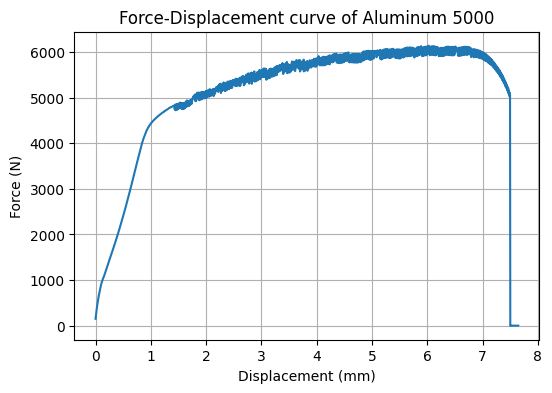

In [12]:
# Plot the force displacement curve
plt.figure(figsize=(6, 4))
plt.plot(crosshead_extensometer, load_extensometer)
plt.xlabel('Displacement (mm)')
plt.ylabel('Force (N)')
plt.title('Force-Displacement curve of Aluminum 5000')
plt.grid()
plt.show()

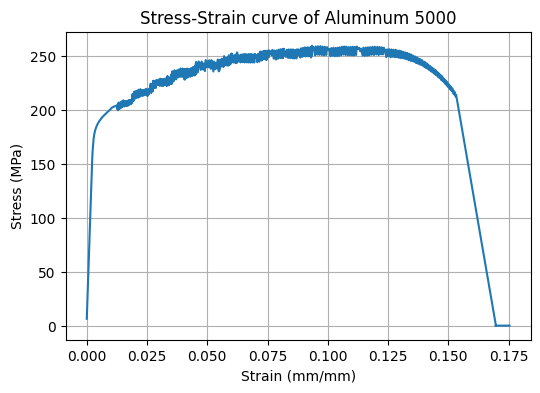

In [15]:
# Specimen dimensions
original_width = 12.12  # mm
original_thickness = 1.95  # mm
parallel_length = 50.50  # mm

# Original cross-sectional area
original_area = original_width * original_thickness  # mm^2

# Calculate stress and strain
stress = load_extensometer / original_area  # Stress in MPa (N/mm^2)
strain = extensometer_extensometer  # Strain (dimensionless)

plt.figure(figsize=(6, 4))
plt.plot(strain, stress)
plt.xlabel('Strain (mm/mm)')
plt.ylabel('Stress (MPa)')
plt.title('Stress-Strain curve of Aluminum 5000')
plt.grid()
plt.show()

In [51]:
# Tensile Strength (UTS)
UTS = max(stress)
print(f"Tensile Strength (UTS): {round(UTS, 4)} MPa")

# Young's Modulus
linear_region = strain < 0.002  # Assuming linear region is below 0.2% strain
Youngs_modulus = np.polyfit(strain[linear_region], stress[linear_region], 1)[0]
print(f"Young's Modulus: {round(Youngs_modulus, 4)} MPa")

# Yield Strength (0.2% offset method)
offset = 0.002
offset_line = Youngs_modulus * (strain - offset)

# Find the intersection of the offset line and the actual stress-strain curve
yield_index = np.argmin(np.abs(offset_line - stress))
yield_strength = stress[yield_index]

print(f"Yield Strength (0.2% offset method): {round(yield_strength, 4)} MPa")

# Poisson's Ratio
axial_strain = extensometer_scaled_strain_gage
transverse_strain = SG_signal_strain_gage / 1e6  # Convert microstrain to strain
poisson_ratio = - np.mean(transverse_strain / axial_strain)
print(f"Poisson's Ratio: {round(poisson_ratio, 4)}")

# Elongation to Fracture
elongation_to_fracture = max(strain[0:-80])
print(f"Elongation to Fracture: {round(elongation_to_fracture * 100, 4)} %")

Tensile Strength (UTS): 259.5786 MPa
Young's Modulus: 66385.8996 MPa
Yield Strength (0.2% offset method): 188.3936 MPa
Poisson's Ratio: 0.2994
Elongation to Fracture: 15.0989 %
